In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import urllib
import bs4
import pandas
from urllib import request
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import pycountry 

# Droit des femmes et développement économique

# Importation et traitement de la base de la Banque mondiale

In [2]:
df_bm=pd.read_csv("WDIData.csv")
df_bm.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.320475,16.643243,16.994695,17.313168,17.604950,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN,NaN
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN,NaN
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_bm2=df_bm[["Country Code", "Country Name", "Indicator Name", "Indicator Code", "2019"]]
df_bm2.head(5)

,Country Code,Country Name,Indicator Name,Indicator Code,2019
0,AFE,Africa Eastern and Southern,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN
1,AFE,Africa Eastern and Southern,Access to electricity (% of population),EG.ELC.ACCS.ZS,43.640661
2,AFE,Africa Eastern and Southern,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,28.841150
3,AFE,Africa Eastern and Southern,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,73.589886
4,AFE,Africa Eastern and Southern,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN


# Importation et traitement de la base de l'OCDE

In [4]:
df_ocde=pd.read_csv('./oecd3.csv', sep=',', encoding='latin-1')
df_ocde.head(5)

,"ï»¿""REGION""",RÃ©gion,LOCATION,Pays,INC,Revenu,VAR,Variable,TIME,AnnÃ©e,Value,Flag Codes,Flags
0,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_LAW,Loi,2019,2019,0.50,NaN,NaN
1,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_ATT,Attitudes,2019,2019,21.10,NaN,NaN
2,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_PRACT,Pratique,2019,2019,1.82,NaN,NaN
3,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_DV_LAW,Loi,2019,2019,0.00,NaN,NaN
4,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_IN_LAW,Loi,2019,2019,0.00,NaN,NaN


In [5]:
# on ne sélectionne que les lignes 'pratique' qui correspondent à la réalité des faits 
df_ocde2=df_ocde[df_ocde['Variable']=="Pratique"]
df_ocde2.rename(columns={'ï»¿"REGION"': 'region_monde', 'RÃ©gion': 'region', 'LOCATION': 'Country Code', 'Pays':'Country Name'}, inplace=True)
df_ocde2=df_ocde2[df_ocde2['region_monde']=="ALL"]
df_ocde2.head(5)

C:\Users\gadole\Documents\python\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,region_monde,region,Country Code,Country Name,INC,Revenu,VAR,Variable,TIME,AnnÃ©e,Value,Flag Codes,Flags
29,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,DF_HR_PRACT,Pratique,2019,2019,1.82,NaN,NaN
34,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RPI_VAW_PRACT,Pratique,2019,2019,16.90,NaN,NaN
36,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RPI_MW_PRACT,Pratique,2019,2019,105.50,NaN,NaN
38,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RPI_RA_PRACT,Pratique,2019,2019,11.00,NaN,NaN
42,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RAPFR_SAFS_PRACT,Pratique,2019,2019,50.00,NaN,NaN


In [6]:
# on ne sélectionne que les colonnes qui nous intéressent 
df_ocde3=df_ocde2[['Country Code', 'Country Name', 'VAR', 'Value']]
df_ocde3.head(5)

,Country Code,Country Name,VAR,Value
29,AUS,Australie,DF_HR_PRACT,1.82
34,AUS,Australie,RPI_VAW_PRACT,16.90
36,AUS,Australie,RPI_MW_PRACT,105.50
38,AUS,Australie,RPI_RA_PRACT,11.00
42,AUS,Australie,RAPFR_SAFS_PRACT,50.00


In [7]:
df_ocde3.shape

(3426, 4)

# Implémentation de la fonction de sélection des colonnes

In [8]:
def bm_select(Indicator, row_name):

    df=df_bm2[df_bm2['Indicator Code']==Indicator]
    df=df[["Country Code", "Country Name", "2019"]]
    df.rename(columns={'2019':row_name}, inplace=True)
    
    return df

In [9]:
def ocde_select(Indicator, row_name):

    df=df_ocde3[df_ocde3['VAR']==Indicator]
    df=df[["Country Code", "Country Name", "2019"]]
    df.rename(columns={'2019':row_name}, inplace=True)
    
    return df

In [10]:
def normalize_columns(df: pd.DataFrame, columns: list)-> pd.DataFrame:   
    for col in columns:
        try:

            df.loc[:,col] = (df.loc[:,col]- df.loc[:,col].min())/(df.loc[:,col].max()- df.loc[:,col].min())
        except:
            print(col + " n'a pas été normalisé \n")
    return df
            

# Création de la base de données

## PIB

In [11]:
df_pib=df_bm2[df_bm2['Indicator Name']=="GDP per capita (constant 2015 US$)"]
df_pib=df_pib[["Country Name","2019", "Country Code"]]
df_pib.rename(columns={'2019': 'GDP per capita 2019'}, inplace=True)
df_pib

,Country Name,GDP per capita 2019,Country Code
469,Africa Eastern and Southern,1499.256275,AFE
1912,Africa Western and Central,1843.558468,AFW
3355,Arab World,6206.570758,ARB
4798,Caribbean small states,10050.327615,CSS
6241,Central Europe and the Baltics,14823.026908,CEB
...,...,...,...
377092,Virgin Islands (U.S.),NaN,VIR
378535,West Bank and Gaza,3378.434621,PSE
379978,"Yemen, Rep.",NaN,YEM
381421,Zambia,1348.743220,ZMB


In [12]:
liste_continents=['AFE','AFW', 'ARB', 'EAS', 'EUU', 'LCN', 'MEA', 'NAC', 'WLD', 'SAS']
df_pib2=df_pib[df_pib['Country Code'].isin(liste_continents)]
df_pib2

,Country Name,GDP per capita 2019,Country Code
469,Africa Eastern and Southern,1499.256275,AFE
1912,Africa Western and Central,1843.558468,AFW
3355,Arab World,6206.570758,ARB
9127,East Asia & Pacific,11233.156450,EAS
19228,European Union,32997.348617,EUU
33658,Latin America & Caribbean,8659.662630,LCN
43759,Middle East & North Africa,7286.710336,MEA
49531,North America,59213.844947,NAC
61075,South Asia,1869.410557,SAS
69733,World,11003.993985,WLD


In [13]:
df_pib2.sort_values("GDP per capita 2019",ascending = True, inplace = True)
df_pib2

<ipython-input-13-2cf8bff45b83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pib2.sort_values("GDP per capita 2019",ascending = True, inplace = True)


,Country Name,GDP per capita 2019,Country Code
469,Africa Eastern and Southern,1499.256275,AFE
1912,Africa Western and Central,1843.558468,AFW
61075,South Asia,1869.410557,SAS
3355,Arab World,6206.570758,ARB
43759,Middle East & North Africa,7286.710336,MEA
33658,Latin America & Caribbean,8659.662630,LCN
69733,World,11003.993985,WLD
9127,East Asia & Pacific,11233.156450,EAS
19228,European Union,32997.348617,EUU
49531,North America,59213.844947,NAC


Text(0.5, 0, 'GDP per capita (2019)')

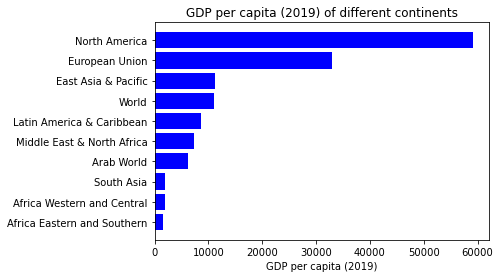

In [14]:
plt.barh(df_pib2["Country Name"], df_pib2['GDP per capita 2019'], color="blue")
plt.title('GDP per capita (2019) of different continents')
plt.xlabel('GDP per capita (2019)')

In [15]:
#df_pib2[values]=bm_select(Indicator="GDP per capita (constant 2015 US$)", row_name=values)

## Indicateur famille (F)

Scrapper le taux de fertilité


In [16]:
df_taux_fertilité=pd.read_csv('data_natalité.csv')
df_taux_fertilité.rename(columns={'Fertility Rate   In 2019 (Births/Woman)': 'Fertility'}, inplace=True)
df_taux_fertilité.head(5)

,Country Name,Fertility
0,Niger,6.824
1,Somalia,5.978
2,DR Congo,5.819
3,Mali,5.785
4,Chad,5.649


In [17]:
#Fonction pour donnner le nom de code du pays des pays scrappés pour le taux de fertilité 
def code_pays(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 est utilisé pour donner le code en 3 lettres du pays
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE# create a column for code 
df_taux_fertilité['CODE']=code_pays(df_taux_fertilité["Country Name"])
df_taux_fertilité.head()

,Country Name,Fertility,CODE
0,Niger,6.824,NER
1,Somalia,5.978,SOM
2,DR Congo,5.819,None
3,Mali,5.785,MLI
4,Chad,5.649,TCD


In [18]:
df_taux_fertilité.rename(columns={'CODE': 'Country Code'}, inplace=True)

In [19]:
df_famille=df_taux_fertilité

In [20]:
#Fonctionqui sert à afficher deux chiffres après la virgule
def shorten_float(nb: float)-> float:
    return int(nb*100)/100.

In [21]:
def fertility_column_cleaner (char: str):
    assert type(char)==str, "The row does not contains str"
    if '-' in char: return np.NaN
    elif '(' in char:
        i=0
        while char[i+1]!= '(':
            i+=1
        return float(char[:i])
    else: return float(char)

In [22]:
df_famille.dropna(inplace=True)
df_famille["Fertility"] = df_famille["Fertility"].apply(fertility_column_cleaner)
df_famille

,Country Name,Fertility,Country Code
0,Niger,6.824,NER
1,Somalia,5.978,SOM
2,DR Congo,5.819,None
3,Mali,5.785,MLI
4,Chad,5.649,TCD
...,...,...,...
259,Saint Kitts and Nevis,2.100,KNA
260,Turks and Caicos Islands,NaN,TCA
261,Tuvalu,NaN,TUV
262,Vatican City,NaN,None


In [23]:
df_famille=df_taux_fertilité.merge(df_pib, on='Country Code', how='outer')
df_famille

,Country Name_x,Fertility,Country Code,Country Name_y,GDP per capita 2019
0,Niger,6.824,NER,Niger,523.658778
1,Somalia,5.978,SOM,Somalia,289.278592
2,DR Congo,5.819,None,NaN,NaN
3,Tanzania,4.832,None,NaN,NaN
4,Ivory Coast,4.593,None,NaN,NaN
...,...,...,...,...,...
342,NaN,NaN,TLS,Timor-Leste,1435.728071
343,NaN,NaN,VEN,"Venezuela, RB",NaN
344,NaN,NaN,VNM,Vietnam,2604.224166
345,NaN,NaN,VIR,Virgin Islands (U.S.),NaN


In [24]:
df_famille.dropna(inplace=True)
df_famille

,Country Name_x,Fertility,Country Code,Country Name_y,GDP per capita 2019
0,Niger,6.824,NER,Niger,523.658778
1,Somalia,5.978,SOM,Somalia,289.278592
82,Mali,5.785,MLI,Mali,815.454597
83,Chad,5.649,TCD,Chad,660.069929
84,Angola,5.442,AGO,Angola,3458.650512
...,...,...,...,...,...
244,Dominica,1.900,DMA,Dominica,7617.846091
245,Marshall Islands,4.000,MHL,Marshall Islands,3595.208450
248,Palau,2.200,PLW,Palau,15213.715905
249,San Marino,1.300,SMR,San Marino,44709.458767


In [25]:
df_famille2=df_famille

In [26]:
#Jusqu'à présent le taux de fertilité était pris en compte comme une chaîne de caractère
#On la convertit donc en nombres
#df_famille2["Fertility"] = pd.to_numeric(df_famille2["Fertility"])

In [27]:
df_famille2["Indicateur famille"]=100-df_famille2["Fertility"]
df_famille2 = normalize_columns(df_famille2,["Indicateur famille"])
#df_famille2['Fertility']=df_famille2['Fertility'].apply(shorten_float)
#df_famille2["Indicateur famille"]=df_famille2["Fertility indicator"]/df_famille2["Fertility indicator"].max()

In [28]:
df_famille2

,Country Name_x,Fertility,Country Code,Country Name_y,GDP per capita 2019,Indicateur famille
0,Niger,6.824,NER,Niger,523.658778,0.000000
1,Somalia,5.978,SOM,Somalia,289.278592,0.147799
82,Mali,5.785,MLI,Mali,815.454597,0.181516
83,Chad,5.649,TCD,Chad,660.069929,0.205276
84,Angola,5.442,AGO,Angola,3458.650512,0.241440
...,...,...,...,...,...,...
244,Dominica,1.900,DMA,Dominica,7617.846091,0.860238
245,Marshall Islands,4.000,MHL,Marshall Islands,3595.208450,0.493361
248,Palau,2.200,PLW,Palau,15213.715905,0.807827
249,San Marino,1.300,SMR,San Marino,44709.458767,0.965059


In [29]:
df_famille2=df_famille2[["Country Code", "Indicateur famille"]]
df_famille2

,Country Code,Indicateur famille
0,NER,0.000000
1,SOM,0.147799
82,MLI,0.181516
83,TCD,0.205276
84,AGO,0.241440
...,...,...
244,DMA,0.860238
245,MHL,0.493361
248,PLW,0.807827
249,SMR,0.965059


In [30]:
df_famille2["Indicateur famille"]=(df_famille2["Indicateur famille"]-df_famille2["Indicateur famille"].min())/(df_famille2["Indicateur famille"].max()-df_famille2["Indicateur famille"].min())
df_famille2

<ipython-input-30-912d49953be5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_famille2["Indicateur famille"]=(df_famille2["Indicateur famille"]-df_famille2["Indicateur famille"].min())/(df_famille2["Indicateur famille"].max()-df_famille2["Indicateur famille"].min())


,Country Code,Indicateur famille
0,NER,0.000000
1,SOM,0.147799
82,MLI,0.181516
83,TCD,0.205276
84,AGO,0.241440
...,...,...
244,DMA,0.860238
245,MHL,0.493361
248,PLW,0.807827
249,SMR,0.965059


In [31]:
df_famille2.set_index(["Country Code"], inplace=True)

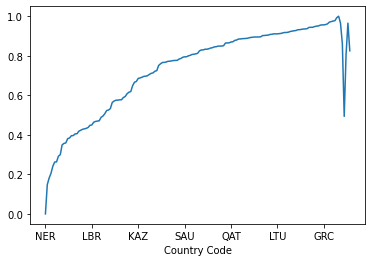

In [32]:
df_famille2["Indicateur famille"].plot()

## Indicateur santé (S)

Trois variables:
- Espérance de vie à la naissance pour les femmes (BM)
- Part des femmes non-enceintes anémiées (BM)
- Part des femmes séropositives (BM)

In [33]:
df_esperance_de_vie= df_bm2[df_bm2['Indicator Code']=="SP.DYN.LE00.FE.IN"]
df_esperance_de_vie=df_esperance_de_vie[["Country Name","2019"]]
df_esperance_de_vie.rename(columns={'2019': 'Life expectancy of women at birth'}, inplace=True)
df_esperance_de_vie.head(5)

,Country Name,Life expectancy of women at birth
693,Africa Eastern and Southern,66.202116
2136,Africa Western and Central,59.231072
3579,Arab World,73.832314
5022,Caribbean small states,76.032605
6465,Central Europe and the Baltics,80.833612


In [34]:
df_anemia= df_bm2[df_bm2['Indicator Code']=="SH.ANM.NPRG.ZS"]
df_anemia=df_anemia[["Country Name", "2019"]]
df_anemia.rename(columns={'2019': 'Prevalence of anemia among non pregnant women'}, inplace=True)
df_anemia.head(5)

,Country Name,Prevalence of anemia among non pregnant women
1087,Africa Eastern and Southern,33.432299
2530,Africa Western and Central,50.511312
3973,Arab World,33.212609
5416,Caribbean small states,20.080555
6859,Central Europe and the Baltics,NaN


In [35]:
df_hiv= df_bm2[df_bm2['Indicator Code']=="SH.DYN.AIDS.FE.ZS"]
df_hiv=df_hiv[["Country Name", "2019"]]
df_hiv.rename(columns={'2019': 'Women share of population living with HIV'}, inplace=True)
df_hiv.head(5)

,Country Name,Women share of population living with HIV
1441,Africa Eastern and Southern,60.062444
2884,Africa Western and Central,61.990050
4327,Arab World,40.461413
5770,Caribbean small states,49.739577
7213,Central Europe and the Baltics,NaN


In [36]:
# On fusionne tout ça dans le df santé
df_sante=df_esperance_de_vie.merge(df_anemia, on='Country Name', how='left')
df_sante=df_sante.merge(df_hiv, on='Country Name', how='outer')
df_sante

,Country Name,Life expectancy of women at birth,Prevalence of anemia among non pregnant women,Women share of population living with HIV
0,Africa Eastern and Southern,66.202116,33.432299,60.062444
1,Africa Western and Central,59.231072,50.511312,61.990050
2,Arab World,73.832314,33.212609,40.461413
3,Caribbean small states,76.032605,20.080555,49.739577
4,Central Europe and the Baltics,80.833612,NaN,NaN
...,...,...,...,...
261,Virgin Islands (U.S.),83.100000,NaN,NaN
262,West Bank and Gaza,75.755000,NaN,NaN
263,"Yemen, Rep.",67.826000,61.800000,37.300000
264,Zambia,66.891000,30.700000,61.500000


### Construction de l'indicateur santé 

In [37]:
df_sante=df_sante.merge(df_pib, on='Country Name', how='outer')
df_sante

,Country Name,Life expectancy of women at birth,Prevalence of anemia among non pregnant women,Women share of population living with HIV,GDP per capita 2019,Country Code
0,Africa Eastern and Southern,66.202116,33.432299,60.062444,1499.256275,AFE
1,Africa Western and Central,59.231072,50.511312,61.990050,1843.558468,AFW
2,Arab World,73.832314,33.212609,40.461413,6206.570758,ARB
3,Caribbean small states,76.032605,20.080555,49.739577,10050.327615,CSS
4,Central Europe and the Baltics,80.833612,NaN,NaN,14823.026908,CEB
...,...,...,...,...,...,...
261,Virgin Islands (U.S.),83.100000,NaN,NaN,NaN,VIR
262,West Bank and Gaza,75.755000,NaN,NaN,3378.434621,PSE
263,"Yemen, Rep.",67.826000,61.800000,37.300000,NaN,YEM
264,Zambia,66.891000,30.700000,61.500000,1348.743220,ZMB


In [38]:
index_with_nan = df_sante.index[df_sante.isnull().any(axis=1)]
index_with_nan.shape
df_sante.drop(index_with_nan,0, inplace=True)

X = df_sante[["Life expectancy of women at birth", "Prevalence of anemia among non pregnant women", "Women share of population living with HIV"]]
X = sm.add_constant(X) # une autre façon d'ajouter une constante 
y = df_sante["GDP per capita 2019"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     GDP per capita 2019   R-squared:                       0.406
Model:                             OLS   Adj. R-squared:                  0.394
Method:                  Least Squares   F-statistic:                     34.37
Date:                 Tue, 04 Jan 2022   Prob (F-statistic):           5.43e-17
Time:                         11:19:12   Log-Likelihood:                -1688.4
No. Observations:                  155   AIC:                             3385.
Df Residuals:                      151   BIC:                             3397.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

Ne sont pris en compte ici que 155 observations, correspondants aux pays sans nan sur toute une ligne. Les résultats sont donc approximatifs pour l'ensemble de l'échantillon, constitué de 266 pays. Je décide de donner un poids différent aux variables dans la construction de mon indicateur, s'appuyant sur la significativité pratique et statistique de ces indicateurs. 
- l'espérance de vie à la naissance semble très significative et explicative. Je lui confère 3/4 de l'explication de l'indicateur
- la prévalence de l'anémie parmi les femmes pas enceintes: 2/12
- la part de femmes vivant avec le VIH: 1/12

In [39]:
df_sante2=df_sante

In [40]:
df_sante2["Share of np women living without anemia"]=100-df_sante2["Prevalence of anemia among non pregnant women"]
df_sante2["Share of np women living without HIV"]=100-df_sante2["Women share of population living with HIV"]

In [41]:
df_sante2["Share of np women living without anemia indicator"]=df_sante2["Share of np women living without anemia"]/df_sante2["Share of np women living without anemia"].max()
df_sante2["Share of np women living without HIV indicator"]=df_sante2["Share of np women living without HIV"]/df_sante2["Share of np women living without HIV"].max()
df_sante2["Life expectancy of women at birth indicator"]=df_sante2["Life expectancy of women at birth"]/df_sante2["Life expectancy of women at birth"].max()

In [42]:
df_sante2["Indicateur sante"]= 3/4 *df_sante2["Life expectancy of women at birth indicator"]+ 2/12*df_sante2["Share of np women living without anemia indicator"] + 1/12*df_sante2["Share of np women living without HIV indicator"]

In [43]:
#df_sante2=df_sante2[["Country Name", "Indicateur sante"]]
#df_sante2

In [44]:
df_sante2=df_sante2[["Country Code", "Indicateur sante"]]
df_sante2

,Country Code,Indicateur sante
0,AFE,0.722549
1,AFW,0.630443
2,ARB,0.805796
3,CSS,0.839958
9,EMU,0.947771
...,...,...
256,URY,0.901667
257,UZB,0.825082
260,VNM,0.884637
264,ZMB,0.732077


In [45]:
# je répartis les données entre 0 et 1
df_sante2["Indicateur sante"]=(df_sante2["Indicateur sante"]-df_sante2["Indicateur sante"].min())/(df_sante2["Indicateur sante"].max()-df_sante2["Indicateur sante"].min())
df_sante2

<ipython-input-45-67272e9bbbd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sante2["Indicateur sante"]=(df_sante2["Indicateur sante"]-df_sante2["Indicateur sante"].min())/(df_sante2["Indicateur sante"].max()-df_sante2["Indicateur sante"].min())


,Country Code,Indicateur sante
0,AFE,0.337619
1,AFW,0.096236
2,ARB,0.555785
3,CSS,0.645313
9,EMU,0.927860
...,...,...
256,URY,0.807036
257,UZB,0.606327
260,VNM,0.762405
264,ZMB,0.362588


## Indicateur ressources économiques (RE)

Trois variables:
- part des femmes proprétaires d'un compte en banque (OCDE)
- partage des tâches domestiques (OCDE)
- variable pour mesurer les écarts de salaire avec les hommes 

In [48]:
#ocde_select("DF_HR_PRACT",'Domestic time ratio women on men')

KeyError: "['2019'] not in index"

In [49]:
df_domestique=df_ocde3[df_ocde3['VAR']=="DF_HR_PRACT"]
df_domestique=df_domestique[['Country Name', "Value", "Country Code"]]
df_domestique.rename(columns={'Value': 'Domestic time ratio women on men'}, inplace=True)
df_domestique.head(5)

,Country Name,Domestic time ratio women on men,Country Code
29,Australie,1.82,AUS
83,Autriche,1.95,AUT
137,Belgique,1.55,BEL
192,Canada,1.51,CAN
299,Danemark,1.39,DNK


In [50]:
df_banque=df_ocde3[df_ocde3['VAR']=="RAPFR_SAFS_PRACT"]
df_banque=df_banque[['Country Name', "Value", "Country Code"]]
df_banque.rename(columns={'Value': 'Women s share amoung bank account owners'}, inplace=True)
df_banque.head(5)

,Country Name,Women s share amoung bank account owners,Country Code
42,Australie,50.0,AUS
97,Autriche,51.1,AUT
151,Belgique,50.8,BEL
206,Canada,50.4,CAN
259,RÃ©publique tchÃ¨que,47.8,CZE


In [51]:
# On fusionne tout ça dans le df ressources économiques
df_ressources_eco=df_domestique.merge(df_banque, on='Country Code', how='outer')
df_ressources_eco = df_ressources_eco.drop_duplicates()
df_ressources_eco

,Country Name_x,Domestic time ratio women on men,Country Code,Country Name_y,Women s share amoung bank account owners
0,Australie,1.82,AUS,Australie,50.0
4,Autriche,1.95,AUT,Autriche,51.1
8,Belgique,1.55,BEL,Belgique,50.8
12,Canada,1.51,CAN,Canada,50.4
16,Danemark,1.39,DNK,Danemark,50.3
...,...,...,...,...,...
498,NaN,NaN,SOM,Somalie,38.7
500,NaN,NaN,TJK,Tadjikistan,44.5
502,NaN,NaN,TGO,Togo,42.1
504,NaN,NaN,YEM,YÃ©men,12.6


## Construction de l'indicateur ressources économiques

In [52]:
df_ressources_eco=df_ressources_eco.merge(df_pib, on='Country Code', how='outer')
df_ressources_eco

,Country Name_x,Domestic time ratio women on men,Country Code,Country Name_y,Women s share amoung bank account owners,Country Name,GDP per capita 2019
0,Australie,1.82,AUS,Australie,50.0,Australia,58923.208212
1,Autriche,1.95,AUT,Autriche,51.1,Austria,46717.720729
2,Belgique,1.55,BEL,Belgique,50.8,Belgium,42887.655132
3,Canada,1.51,CAN,Canada,50.4,Canada,44958.088687
4,Danemark,1.39,DNK,Danemark,50.3,Denmark,57553.131240
...,...,...,...,...,...,...,...
263,NaN,NaN,TON,NaN,NaN,Tonga,4652.588587
264,NaN,NaN,TCA,NaN,NaN,Turks and Caicos Islands,28693.061321
265,NaN,NaN,TUV,NaN,NaN,Tuvalu,3674.354085
266,NaN,NaN,VUT,NaN,NaN,Vanuatu,2882.402195


In [53]:
df_ressources_eco[df_ressources_eco['Country Name']=="Nigeria"]['Women s share amoung bank account owners']

82    34.0
Name: Women s share amoung bank account owners, dtype: float64

In [54]:
df_ressources_eco.dropna(inplace=True)

X = df_ressources_eco[["Domestic time ratio women on men", "Women s share amoung bank account owners"]]
X = sm.add_constant(X) 
y = df_ressources_eco["GDP per capita 2019"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     GDP per capita 2019   R-squared:                       0.193
Model:                             OLS   Adj. R-squared:                  0.176
Method:                  Least Squares   F-statistic:                     11.12
Date:                 Tue, 04 Jan 2022   Prob (F-statistic):           4.68e-05
Time:                         11:21:01   Log-Likelihood:                -1084.9
No. Observations:                   96   AIC:                             2176.
Df Residuals:                       93   BIC:                             2183.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

Les variables semblent assez pertinentes : l'hypothèse nulle est rejetée au seul de 5% pour les deux variables. Le R carré est assez faible mais cela montre néanmoins que les variables peuvent être prise en compte dans l'explication du capital du pays. 

Une augmentation d'une unité du ratio de temps domestique homme/femme a un impact négatif important sur le PIB par habitant tandis qu'une augmentation d'une unité de la proportion des femmes possédant un compte bancaire a un impact positif plus néglibeable sur le PIB par habitant du pays.

Au vu des résultats de la régression je décide de donner un facteur 7/10 au ratio du temps de travail domestique et 3/10 à la part des femmes possédant un compte bancaire. Je vais désormais rapporter mes données à une valeur entre 0 et 1. 

In [55]:
df_ressources_eco2=df_ressources_eco

In [56]:
df_ressources_eco2["Women's share amoung bank account owners indicator"]=df_ressources_eco2["Women s share amoung bank account owners"]/df_ressources_eco2["Women s share amoung bank account owners"].max()
df_ressources_eco2["Domestic time ratio women on men (quota)"]=100-df_ressources_eco2["Domestic time ratio women on men"]
df_ressources_eco2["Domestic time ratio women on men indicator"]=df_ressources_eco2["Domestic time ratio women on men (quota)"]/df_ressources_eco2["Domestic time ratio women on men (quota)"].max()

In [57]:
df_ressources_eco2

,Country Name_x,Domestic time ratio women on men,Country Code,Country Name_y,Women s share amoung bank account owners,Country Name,GDP per capita 2019,Women's share amoung bank account owners indicator,Domestic time ratio women on men (quota),Domestic time ratio women on men indicator
0,Australie,1.82,AUS,Australie,50.0,Australia,58923.208212,0.900901,98.18,0.994329
1,Autriche,1.95,AUT,Autriche,51.1,Austria,46717.720729,0.920721,98.05,0.993012
2,Belgique,1.55,BEL,Belgique,50.8,Belgium,42887.655132,0.915315,98.45,0.997063
3,Canada,1.51,CAN,Canada,50.4,Canada,44958.088687,0.908108,98.49,0.997468
4,Danemark,1.39,DNK,Danemark,50.3,Denmark,57553.131240,0.906306,98.61,0.998683
...,...,...,...,...,...,...,...,...,...,...
97,Rwanda,2.63,RWA,Rwanda,46.0,Rwanda,885.599612,0.828829,97.37,0.986125
98,Sierra Leone,2.99,SLE,Sierra Leone,39.5,Sierra Leone,651.897740,0.711712,97.01,0.982479
99,Tanzanie,3.72,TZA,Tanzanie,45.7,Tanzania,985.448208,0.823423,96.28,0.975086
100,Ouganda,3.88,UGA,Ouganda,41.3,Uganda,898.407515,0.744144,96.12,0.973466


In [58]:
df_ressources_eco2["Indicateur ressources éco"]= 3/10 *df_ressources_eco2["Domestic time ratio women on men indicator"]+ 7/10*df_ressources_eco2["Women's share amoung bank account owners indicator"] 

In [59]:
df_ressources_eco2=df_ressources_eco2[["Country Code", "Indicateur ressources éco"]]
df_ressources_eco2

,Country Code,Indicateur ressources éco
0,AUS,0.928929
1,AUT,0.942408
2,BEL,0.939840
3,CAN,0.934916
4,DNK,0.934019
...,...,...
97,RWA,0.876018
98,SLE,0.792942
99,TZA,0.868922
100,UGA,0.812941


In [60]:
df_ressources_eco2["Indicateur ressources économiques"]=(df_ressources_eco2["Indicateur ressources éco"]-df_ressources_eco2["Indicateur ressources éco"].min())/(df_ressources_eco2["Indicateur ressources éco"].max()-df_ressources_eco2["Indicateur ressources éco"].min())

<ipython-input-60-5158ea55fa40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ressources_eco2["Indicateur ressources économiques"]=(df_ressources_eco2["Indicateur ressources éco"]-df_ressources_eco2["Indicateur ressources éco"].min())/(df_ressources_eco2["Indicateur ressources éco"].max()-df_ressources_eco2["Indicateur ressources éco"].min())


In [144]:
df_ressources_eco2 = df_ressources_eco2.drop(df_ressources_eco2 .columns[1], axis = 1)
df_ressources_eco2 


,Country Code,Indicateur ressources économiques
0,AUS,0.868785
1,AUT,0.895291
2,BEL,0.890240
3,CAN,0.880558
4,DNK,0.878795
...,...,...
97,RWA,0.764736
98,SLE,0.601370
99,TZA,0.750783
100,UGA,0.640697


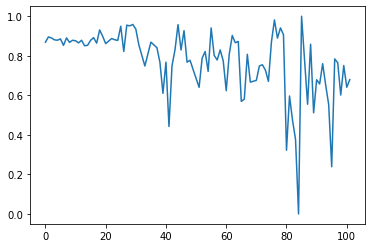

In [145]:
df_ressources_eco2["Indicateur ressources économiques"].plot()

## Indicateur éducation (E)

3 variables : 
- Adolescents out of school, female (% of female lower secondary school age) (à comparer avec les hommes) (BM)
- Children out of school, female (% of female primary school age) (à comparer avec les hommes) (BM)
- Primary completion rate, female (% of relevant age group) (à comparer avec les hommes) (BM)

In [63]:
bm_select("SE.PRM.UNER.FE.ZS",'Adolescents s share out of school, female')

,Country Code,Country Name,"Adolescents s share out of school, female"
176,AFE,Africa Eastern and Southern,NaN
1619,AFW,Africa Western and Central,NaN
3062,ARB,Arab World,15.58040
4505,CSS,Caribbean small states,NaN
5948,CEB,Central Europe and the Baltics,4.30292
...,...,...,...
376799,VIR,Virgin Islands (U.S.),NaN
378242,PSE,West Bank and Gaza,3.42811
379685,YEM,"Yemen, Rep.",NaN
381128,ZMB,Zambia,NaN


In [64]:
df_descolariation_ado_w = df_bm2[df_bm2['Indicator Code']=="SE.PRM.UNER.FE.ZS"]
df_descolariation_ado_w = df_descolariation_ado_w[["Country Name", "2019"]]
df_descolariation_ado_w.rename(columns={'2019': 'Adolescents s share out of school, female' }, inplace=True)
df_descolariation_ado_w.dropna(inplace=True)
df_descolariation_ado_w

,Country Name,"Adolescents s share out of school, female"
3062,Arab World,15.58040
5948,Central Europe and the Baltics,4.30292
7391,Early-demographic dividend,7.16961
8834,East Asia & Pacific,3.71035
10277,East Asia & Pacific (excluding high income),3.89582
...,...,...
368141,United States,0.84899
369584,Uruguay,0.10794
372470,Vanuatu,4.92230
378242,West Bank and Gaza,3.42811


In [65]:
df_descolariation_child_w = df_bm2[df_bm2['Indicator Code']=="SE.SEC.UNER.LO.FE.ZS"]
df_descolariation_child_w = df_descolariation_child_w[["Country Name", "2019"]]
df_descolariation_child_w.rename(columns={'2019': 'Children s share out of school, female' }, inplace=True)
df_descolariation_child_w.dropna(inplace=True)
df_descolariation_child_w

,Country Name,"Children s share out of school, female"
2936,Arab World,18.380989
4379,Caribbean small states,11.200680
5822,Central Europe and the Baltics,5.755160
7265,Early-demographic dividend,14.966480
8708,East Asia & Pacific,8.193100
...,...,...
352142,Tonga,1.220810
356471,Turkey,3.997050
360800,Tuvalu,30.021139
370901,Uzbekistan,2.400170


In [66]:
df_primary_completion_rate_f = df_bm2[df_bm2['Indicator Code']=="SE.PRM.CMPT.FE.ZS"]
df_primary_completion_rate_f = df_primary_completion_rate_f[["Country Name", "2019"]]
df_primary_completion_rate_f.rename(columns={'2019': 'Women who completed primary'}, inplace=True)
df_primary_completion_rate_f.dropna(inplace=True)
df_primary_completion_rate_f

,Country Name,Women who completed primary
4003,Arab World,84.786118
6889,Central Europe and the Baltics,93.246231
8332,Early-demographic dividend,92.725899
9775,East Asia & Pacific,98.524117
11218,East Asia & Pacific (excluding high income),98.392372
...,...,...
369082,United States,103.343628
371968,Uzbekistan,105.434479
373411,Vanuatu,89.518570
379183,West Bank and Gaza,96.771599


In [67]:
df_descolariation_ado_m = df_bm2[df_bm2['Indicator Code']=="SE.SEC.UNER.LO.MA.ZS"]
df_descolariation_ado_m = df_descolariation_ado_m[["Country Name", "2019"]]
df_descolariation_ado_m.rename(columns={'2019': 'Adolescents s share out of school, male' }, inplace=True)
df_descolariation_ado_m.dropna(inplace=True)
df_descolariation_ado_m

,Country Name,"Adolescents s share out of school, male"
2937,Arab World,14.444240
4380,Caribbean small states,13.179200
5823,Central Europe and the Baltics,4.963980
7266,Early-demographic dividend,17.181940
8709,East Asia & Pacific,9.760090
...,...,...
352143,Tonga,11.204660
356472,Turkey,3.003520
360801,Tuvalu,31.799999
370902,Uzbekistan,0.076630


In [68]:
df_descolariation_child_m = df_bm2[df_bm2['Indicator Code']=="SE.PRM.UNER.MA.ZS"]
df_descolariation_child_m = df_descolariation_child_m[["Country Name", "2019"]]
df_descolariation_child_m.rename(columns={'2019': 'Children s share out of school, male' }, inplace=True)
df_descolariation_child_m.dropna(inplace=True)
df_descolariation_child_m

,Country Name,"Children s share out of school, male"
3063,Arab World,12.52604
5949,Central Europe and the Baltics,4.57264
7392,Early-demographic dividend,5.96515
8835,East Asia & Pacific,2.86261
10278,East Asia & Pacific (excluding high income),2.96687
...,...,...
368142,United States,0.98131
369585,Uruguay,1.00179
372471,Vanuatu,3.69256
378243,West Bank and Gaza,3.47648


In [69]:
df_primary_completion_rate_m = df_bm2[df_bm2['Indicator Code']=="SE.PRM.CMPT.MA.ZS"]
df_primary_completion_rate_m = df_primary_completion_rate_m[["Country Name", "2019"]]
df_primary_completion_rate_m.rename(columns={'2019': 'Men who completed primary'}, inplace=True)
df_primary_completion_rate_m.dropna(inplace=True)
df_primary_completion_rate_m

,Country Name,Men who completed primary
4004,Arab World,88.188232
6890,Central Europe and the Baltics,93.638771
8333,Early-demographic dividend,91.436913
9776,East Asia & Pacific,98.225960
11219,East Asia & Pacific (excluding high income),98.043877
...,...,...
369083,United States,97.752640
371969,Uzbekistan,105.801231
373412,Vanuatu,90.030670
379184,West Bank and Gaza,95.892723


In [70]:
#On fusionne nos différents data frame
df_education = df_descolariation_ado_w.merge(df_descolariation_child_w, on='Country Name', how='left')
df_education = df_education.merge(df_descolariation_child_m, on='Country Name', how='outer')
df_education = df_education.merge(df_primary_completion_rate_f, on='Country Name', how='outer')
df_education = df_education.merge(df_primary_completion_rate_m, on='Country Name', how='outer')
df_education = df_education.merge(df_descolariation_ado_m, on='Country Name', how='outer')
df_education

,Country Name,"Adolescents s share out of school, female","Children s share out of school, female","Children s share out of school, male",Women who completed primary,Men who completed primary,"Adolescents s share out of school, male"
0,Arab World,15.58040,18.380989,12.52604,84.786118,88.188232,14.44424
1,Central Europe and the Baltics,4.30292,5.755160,4.57264,93.246231,93.638771,4.96398
2,Early-demographic dividend,7.16961,14.966480,5.96515,92.725899,91.436913,17.18194
3,East Asia & Pacific,3.71035,8.193100,2.86261,98.524117,98.225960,9.76009
4,East Asia & Pacific (excluding high income),3.89582,8.626310,2.96687,98.392372,98.043877,10.27668
...,...,...,...,...,...,...,...
182,Brazil,NaN,NaN,NaN,NaN,NaN,3.43146
183,France,NaN,NaN,NaN,NaN,NaN,0.41550
184,Netherlands,NaN,NaN,NaN,NaN,NaN,3.25716
185,New Zealand,NaN,NaN,NaN,NaN,NaN,0.17013


## Construction de l'indicateur éducation

In [71]:
#On fusionne le data frame précédent avec celui contenant les données pour le PIB
df_education2=df_education.merge(df_pib, on='Country Name', how='outer')
df_education2

,Country Name,"Adolescents s share out of school, female","Children s share out of school, female","Children s share out of school, male",Women who completed primary,Men who completed primary,"Adolescents s share out of school, male",GDP per capita 2019,Country Code
0,Arab World,15.58040,18.380989,12.52604,84.786118,88.188232,14.44424,6206.570758,ARB
1,Central Europe and the Baltics,4.30292,5.755160,4.57264,93.246231,93.638771,4.96398,14823.026908,CEB
2,Early-demographic dividend,7.16961,14.966480,5.96515,92.725899,91.436913,17.18194,3535.796160,EAR
3,East Asia & Pacific,3.71035,8.193100,2.86261,98.524117,98.225960,9.76009,11233.156450,EAS
4,East Asia & Pacific (excluding high income),3.89582,8.626310,2.96687,98.392372,98.043877,10.27668,8122.691059,EAP
...,...,...,...,...,...,...,...,...,...
261,"Venezuela, RB",NaN,NaN,NaN,NaN,NaN,NaN,NaN,VEN
262,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,2604.224166,VNM
263,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,VIR
264,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,YEM


In [72]:
#On supprime les lignes pour lesquelles il existe des données manquantes
df_education2.dropna(inplace=True)
df_education2

,Country Name,"Adolescents s share out of school, female","Children s share out of school, female","Children s share out of school, male",Women who completed primary,Men who completed primary,"Adolescents s share out of school, male",GDP per capita 2019,Country Code
0,Arab World,15.580400,18.380989,12.52604,84.786118,88.188232,14.444240,6206.570758,ARB
1,Central Europe and the Baltics,4.302920,5.755160,4.57264,93.246231,93.638771,4.963980,14823.026908,CEB
2,Early-demographic dividend,7.169610,14.966480,5.96515,92.725899,91.436913,17.181940,3535.796160,EAR
3,East Asia & Pacific,3.710350,8.193100,2.86261,98.524117,98.225960,9.760090,11233.156450,EAS
4,East Asia & Pacific (excluding high income),3.895820,8.626310,2.96687,98.392372,98.043877,10.276680,8122.691059,EAP
...,...,...,...,...,...,...,...,...,...
103,South Africa,9.809540,9.923050,11.74443,93.236481,90.783951,10.718860,5574.643890,ZAF
107,Timor-Leste,3.025670,8.572550,6.71849,109.208267,101.314278,11.838390,1435.728071,TLS
109,Turkey,5.026730,3.997050,4.54793,90.439949,91.236282,3.003520,11956.197821,TUR
110,Tuvalu,22.486771,30.021139,15.97484,75.409843,78.294571,31.799999,3674.354085,TUV


In [73]:
df_education2["Ratio women on men ado out school"]= df_education2["Adolescents s share out of school, female"]/df_education2["Adolescents s share out of school, male"]
df_education2["Ratio women on men children out school"]= df_education2["Children s share out of school, female"]/df_education2["Children s share out of school, male"]
df_education2["Ratio women on men completed primary"]= df_education2["Women who completed primary"]/df_education2["Men who completed primary"]
df_education2

,Country Name,"Adolescents s share out of school, female","Children s share out of school, female","Children s share out of school, male",Women who completed primary,Men who completed primary,"Adolescents s share out of school, male",GDP per capita 2019,Country Code,Ratio women on men ado out school,Ratio women on men children out school,Ratio women on men completed primary
0,Arab World,15.580400,18.380989,12.52604,84.786118,88.188232,14.444240,6206.570758,ARB,1.078658,1.467422,0.961422
1,Central Europe and the Baltics,4.302920,5.755160,4.57264,93.246231,93.638771,4.963980,14823.026908,CEB,0.866829,1.258608,0.995808
2,Early-demographic dividend,7.169610,14.966480,5.96515,92.725899,91.436913,17.181940,3535.796160,EAR,0.417276,2.508986,1.014097
3,East Asia & Pacific,3.710350,8.193100,2.86261,98.524117,98.225960,9.760090,11233.156450,EAS,0.380155,2.862108,1.003035
4,East Asia & Pacific (excluding high income),3.895820,8.626310,2.96687,98.392372,98.043877,10.276680,8122.691059,EAP,0.379093,2.907546,1.003554
...,...,...,...,...,...,...,...,...,...,...,...,...
103,South Africa,9.809540,9.923050,11.74443,93.236481,90.783951,10.718860,5574.643890,ZAF,0.915166,0.844915,1.027015
107,Timor-Leste,3.025670,8.572550,6.71849,109.208267,101.314278,11.838390,1435.728071,TLS,0.255581,1.275964,1.077916
109,Turkey,5.026730,3.997050,4.54793,90.439949,91.236282,3.003520,11956.197821,TUR,1.673613,0.878872,0.991272
110,Tuvalu,22.486771,30.021139,15.97484,75.409843,78.294571,31.799999,3674.354085,TUV,0.707131,1.879276,0.963155


In [74]:
X = df_education2[["Ratio women on men ado out school", "Ratio women on men children out school", "Ratio women on men completed primary"]]
X = sm.add_constant(X)
y = df_education2["GDP per capita 2019"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     GDP per capita 2019   R-squared:                       0.004
Model:                             OLS   Adj. R-squared:                 -0.034
Method:                  Least Squares   F-statistic:                    0.1003
Date:                 Tue, 04 Jan 2022   Prob (F-statistic):              0.960
Time:                         11:21:02   Log-Likelihood:                -914.74
No. Observations:                   83   AIC:                             1837.
Df Residuals:                       79   BIC:                             1847.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

On constate que les variables ne sont pas significatives statistiquement. 
Par ailleurs, celles qui portent sur le ratio de déscolarisation sont peu significatives en pratique. 
On conserve ici 83 observations sur les 266 initiales. 
On accorde le poids suivant aux différentes variables explicatives : 
 - Ratio des adolescents qui ne sont pas scolarisés :  1/20
 - Ration des enfants qui ne sont pas scolarisés : 1/20
 - Ratio de fin de scolarisation primaire : 18/20

In [75]:
df_education2["ratio ado desco indicator"] = df_education2["Ratio women on men ado out school"]/df_education2["Ratio women on men ado out school"].max()
df_education2["ratio children desco indicator"] = df_education2["Ratio women on men children out school"]/df_education2["Ratio women on men children out school"].max()
df_education2["ratio primary completion rate indicator"] = df_education2["Ratio women on men completed primary"]/df_education2["Ratio women on men completed primary"].max()

In [76]:
#Création de l'indicateur à l'aide des coefficients de pondération
df_education2["Indicateur education"] = 1/20 * df_education2["ratio ado desco indicator"] + 1/20 * df_education2["ratio children desco indicator"] + 18/20 * df_education2["ratio primary completion rate indicator"]

In [77]:
df_education2[["Country Code", "Indicateur education"]]

,Country Code,Indicateur education
0,ARB,0.708366
1,CEB,0.733410
2,EAR,0.747500
3,EAS,0.739590
4,EAP,0.740002
...,...,...
103,ZAF,0.756097
107,TLS,0.793514
109,TUR,0.730185
110,TUV,0.709751


In [78]:
#On échelonne les valeurs entre 0 et 1
df_education2["Indicateur education"]=(df_education2["Indicateur education"]-df_education2["Indicateur education"].min())/(df_education2["Indicateur education"].max()-df_education2["Indicateur education"].min())
df_education2[["Country Code", "Indicateur education"]]

,Country Code,Indicateur education
0,ARB,0.181754
1,CEB,0.288130
2,EAR,0.347979
3,EAS,0.314379
4,EAP,0.316128
...,...,...
103,ZAF,0.384492
107,TLS,0.543423
109,TUR,0.274429
110,TUV,0.187635


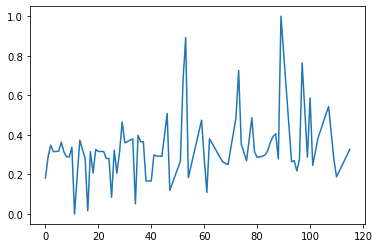

In [79]:
df_education2["Indicateur education"].plot()

In [80]:
df_education3 = df_education2[["Country Code", "Indicateur education"]]
df_education3

,Country Code,Indicateur education
0,ARB,0.181754
1,CEB,0.288130
2,EAR,0.347979
3,EAS,0.314379
4,EAP,0.316128
...,...,...
103,ZAF,0.384492
107,TLS,0.543423
109,TUR,0.274429
110,TUV,0.187635


## Indicateur autonomie du corps (AC)

In [81]:
df_contraception=df_ocde3[df_ocde3['VAR']=="RPI_RA_PRACT"]
df_contraception=df_contraception[['Country Name','Country Code', "Value"]]
df_contraception.rename(columns={'Value': 'No contraception used without wanting having children'}, inplace=True)
df_contraception.head(5)

,Country Name,Country Code,No contraception used without wanting having children
38,Australie,AUS,11.0
92,Autriche,AUT,10.0
146,Belgique,BEL,7.0
201,Canada,CAN,7.0
254,RÃ©publique tchÃ¨que,CZE,4.3


In [82]:
df_violences=df_ocde3[df_ocde3['VAR']=="RPI_VAW_PRACT"]
df_violences=df_violences[['Country Name','Country Code', "Value"]]
df_violences.rename(columns={'Value': 'Physical and sexual violences on women'}, inplace=True)
df_violences.head(5)

,Country Name,Country Code,Physical and sexual violences on women
34,Australie,AUS,16.9
88,Autriche,AUT,13.0
142,Belgique,BEL,24.0
197,Canada,CAN,1.9
250,RÃ©publique tchÃ¨que,CZE,21.0


In [83]:
# Provient de la banque mondiale 2018 
df_bm3=df_bm[["Country Code", "Country Name", "Indicator Name", "Indicator Code", "2018"]]

df_homicide= df_bm3[df_bm3['Indicator Code']=="VC.IHR.PSRC.FE.P5"]
df_homicide=df_homicide[["Country Name","Country Code", "2018"]]
df_homicide.rename(columns={'2018': 'Intentional homicides per 100,000 female'}, inplace=True)
df_homicide.head(5)

,Country Name,Country Code,"Intentional homicides per 100,000 female"
634,Africa Eastern and Southern,AFE,NaN
2077,Africa Western and Central,AFW,NaN
3520,Arab World,ARB,NaN
4963,Caribbean small states,CSS,NaN
6406,Central Europe and the Baltics,CEB,NaN


In [84]:
# On fusionne tout ça dans le df autonomie du corps
df_autonomie_corps=df_contraception.merge(df_violences, on='Country Code', how='outer')
df_autonomie_corps=df_autonomie_corps.merge(df_homicide, on='Country Code', how='outer')
df_autonomie_corps = df_autonomie_corps.drop_duplicates()
df_autonomie_corps=df_autonomie_corps[["Country Code","No contraception used without wanting having children", "Physical and sexual violences on women", "Intentional homicides per 100,000 female" ]]
df_autonomie_corps.head(5)

,Country Code,No contraception used without wanting having children,Physical and sexual violences on women,"Intentional homicides per 100,000 female"
0,AUS,11.0,16.9,0.656064
4,AUT,10.0,13.0,0.973572
8,BEL,7.0,24.0,NaN
12,CAN,7.0,1.9,NaN
16,CZE,4.3,21.0,NaN


### Construction de l'indicateur autonomie du corps

In [85]:
df_autonomie_corps2=df_autonomie_corps.merge(df_pib, on='Country Code', how='outer')
df_autonomie_corps2

,Country Code,No contraception used without wanting having children,Physical and sexual violences on women,"Intentional homicides per 100,000 female",Country Name,GDP per capita 2019
0,AUS,11.0,16.9,0.656064,Australia,58923.208212
1,AUT,10.0,13.0,0.973572,Austria,46717.720729
2,BEL,7.0,24.0,NaN,Belgium,42887.655132
3,CAN,7.0,1.9,NaN,Canada,44958.088687
4,CZE,4.3,21.0,NaN,Czech Republic,20202.151592
...,...,...,...,...,...,...
261,TON,NaN,NaN,NaN,Tonga,4652.588587
262,TCA,NaN,NaN,NaN,Turks and Caicos Islands,28693.061321
263,TUV,NaN,NaN,NaN,Tuvalu,3674.354085
264,VUT,NaN,NaN,NaN,Vanuatu,2882.402195


In [86]:
df_autonomie_corps2=df_autonomie_corps2[["Country Name", "Country Code", "No contraception used without wanting having children", "Physical and sexual violences on women", "GDP per capita 2019"]]
df_autonomie_corps2

,Country Name,Country Code,No contraception used without wanting having children,Physical and sexual violences on women,GDP per capita 2019
0,Australia,AUS,11.0,16.9,58923.208212
1,Austria,AUT,10.0,13.0,46717.720729
2,Belgium,BEL,7.0,24.0,42887.655132
3,Canada,CAN,7.0,1.9,44958.088687
4,Czech Republic,CZE,4.3,21.0,20202.151592
...,...,...,...,...,...
261,Tonga,TON,NaN,NaN,4652.588587
262,Turks and Caicos Islands,TCA,NaN,NaN,28693.061321
263,Tuvalu,TUV,NaN,NaN,3674.354085
264,Vanuatu,VUT,NaN,NaN,2882.402195


In [87]:
index_with_nan = df_autonomie_corps2.index[df_autonomie_corps2.isnull().any(axis=1)]
index_with_nan.shape
df_autonomie_corps2.drop(index_with_nan,0, inplace=True)
df_autonomie_corps2

C:\Users\gadole\Documents\python\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country Name,Country Code,No contraception used without wanting having children,Physical and sexual violences on women,GDP per capita 2019
0,Australia,AUS,11.0,16.9,58923.208212
1,Austria,AUT,10.0,13.0,46717.720729
2,Belgium,BEL,7.0,24.0,42887.655132
3,Canada,CAN,7.0,1.9,44958.088687
4,Czech Republic,CZE,4.3,21.0,20202.151592
...,...,...,...,...,...
165,Tajikistan,TJK,22.9,20.3,1174.091716
166,Tanzania,TZA,22.1,41.7,985.448208
167,Togo,TGO,33.6,22.1,630.790510
168,Uganda,UGA,29.6,49.9,898.407515


In [88]:
index_with_nan = df_autonomie_corps2.index[df_autonomie_corps2.isnull().any(axis=1)]
index_with_nan.shape
df_autonomie_corps2.drop(index_with_nan,0, inplace=True)

X = df_autonomie_corps2[["No contraception used without wanting having children", "Physical and sexual violences on women"]]
X = sm.add_constant(X) # une autre façon d'ajouter une constante 
y = df_autonomie_corps2["GDP per capita 2019"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     GDP per capita 2019   R-squared:                       0.227
Model:                             OLS   Adj. R-squared:                  0.215
Method:                  Least Squares   F-statistic:                     18.77
Date:                 Tue, 04 Jan 2022   Prob (F-statistic):           7.12e-08
Time:                         11:21:03   Log-Likelihood:                -1456.6
No. Observations:                  131   AIC:                             2919.
Df Residuals:                      128   BIC:                             2928.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

C:\Users\gadole\Documents\python\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Ne sont pris en compte ici que 131 observations, correspondants aux pays sans nan sur toute une ligne. Les résultats sont donc approximatifs pour l'ensemble de l'échantillon, constitué de 266 pays. Je décide de donner un poids différent aux variables dans la construction de mon indicateur, s'appuyant sur la significativité pratique et statistique de ces indicateurs. 
- la non utilisation de contraception au sein d'un couple: 2/3
- les violences physiques et sexuelles à l'encontre des femmes: 1/3
Je retire la variable intentional homicides, étant trop peu renseignée (70 valeurs environ)

In [89]:
df_autonomie_corps2["Contraception used without wanting having children"]=100-df_autonomie_corps2["No contraception used without wanting having children"]
df_autonomie_corps2["No physical and sexual violences on women"]=100-df_autonomie_corps2["Physical and sexual violences on women"]

<ipython-input-89-7dacfd3cb900>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_autonomie_corps2["Contraception used without wanting having children"]=100-df_autonomie_corps2["No contraception used without wanting having children"]
<ipython-input-89-7dacfd3cb900>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_autonomie_corps2["No physical and sexual violences on women"]=100-df_autonomie_corps2["Physical and sexual violences on women"]


In [90]:
df_autonomie_corps2["Contraception used without wanting having children indicator"]=df_autonomie_corps2["Contraception used without wanting having children"]/df_autonomie_corps2["Contraception used without wanting having children"].max()
df_autonomie_corps2["No physical and sexual violences on women indicator"]=df_autonomie_corps2["No physical and sexual violences on women"]/df_autonomie_corps2["No physical and sexual violences on women"].max()
df_autonomie_corps2

<ipython-input-90-f8a06908e033>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_autonomie_corps2["Contraception used without wanting having children indicator"]=df_autonomie_corps2["Contraception used without wanting having children"]/df_autonomie_corps2["Contraception used without wanting having children"].max()
<ipython-input-90-f8a06908e033>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_autonomie_corps2["No physical and sexual violences on women indicator"]=df_autonomie_corps2["No physical and 

,Country Name,Country Code,No contraception used without wanting having children,Physical and sexual violences on women,GDP per capita 2019,Contraception used without wanting having children,No physical and sexual violences on women,Contraception used without wanting having children indicator,No physical and sexual violences on women indicator
0,Australia,AUS,11.0,16.9,58923.208212,89.0,83.1,0.927083,0.847095
1,Austria,AUT,10.0,13.0,46717.720729,90.0,87.0,0.937500,0.886850
2,Belgium,BEL,7.0,24.0,42887.655132,93.0,76.0,0.968750,0.774720
3,Canada,CAN,7.0,1.9,44958.088687,93.0,98.1,0.968750,1.000000
4,Czech Republic,CZE,4.3,21.0,20202.151592,95.7,79.0,0.996875,0.805301
...,...,...,...,...,...,...,...,...,...
165,Tajikistan,TJK,22.9,20.3,1174.091716,77.1,79.7,0.803125,0.812436
166,Tanzania,TZA,22.1,41.7,985.448208,77.9,58.3,0.811458,0.594292
167,Togo,TGO,33.6,22.1,630.790510,66.4,77.9,0.691667,0.794088
168,Uganda,UGA,29.6,49.9,898.407515,70.4,50.1,0.733333,0.510703


In [91]:
df_autonomie_corps2["indicateur autonomie corps"]=2/3*df_autonomie_corps2["Contraception used without wanting having children indicator"] + 1/3*2/3*df_autonomie_corps2["No physical and sexual violences on women indicator"]
df_autonomie_corps3=df_autonomie_corps2[[ "Country Code", "indicateur autonomie corps"]]
df_autonomie_corps3

<ipython-input-91-59c06d4f5c9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_autonomie_corps2["indicateur autonomie corps"]=2/3*df_autonomie_corps2["Contraception used without wanting having children indicator"] + 1/3*2/3*df_autonomie_corps2["No physical and sexual violences on women indicator"]


,Country Code,indicateur autonomie corps
0,AUS,0.806299
1,AUT,0.822078
2,BEL,0.817993
3,CAN,0.868056
4,CZE,0.843539
...,...,...
165,TJK,0.715958
166,TZA,0.673037
167,TGO,0.637575
168,UGA,0.602379


In [92]:
# Répartition entre 0 et 1
df_autonomie_corps3["indicateur autonomie corps"]=(df_autonomie_corps3["indicateur autonomie corps"]-df_autonomie_corps3["indicateur autonomie corps"].min())/(df_autonomie_corps3["indicateur autonomie corps"].max()-df_autonomie_corps3["indicateur autonomie corps"].min())
df_autonomie_corps3

<ipython-input-92-8c36985c4058>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_autonomie_corps3["indicateur autonomie corps"]=(df_autonomie_corps3["indicateur autonomie corps"]-df_autonomie_corps3["indicateur autonomie corps"].min())/(df_autonomie_corps3["indicateur autonomie corps"].max()-df_autonomie_corps3["indicateur autonomie corps"].min())


,Country Code,indicateur autonomie corps
0,AUS,0.826692
1,AUT,0.870972
2,BEL,0.859510
3,CAN,1.000000
4,CZE,0.931199
...,...,...
165,TJK,0.573168
166,TZA,0.452719
167,TGO,0.353202
168,UGA,0.254430


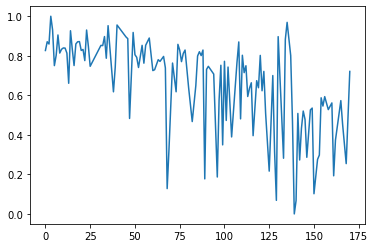

In [93]:
df_autonomie_corps3["indicateur autonomie corps"].plot()

## Indicateur activité économique (AE)

Nous avons testé pour cet indicateur un certain nombre de variables paraissant pertinenents dans les plots à l'image de: 

- Unemployment, female (% of female labor force) (modeled ILO estimate) (à comparer avec les hommes)
- Employers, female (% of female employment) (modeled ILO estimate)
- Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)
- Part time employement (à comparer avec les hommes)

Mais au vu de la régression effectuée, nous en avons retenu que trois pour former l'indicateur: 

- Employment to population ratio, 15+, female (%) (national estimate)
- Vulnerable employment, female (% of female employment) (modeled ILO estimate) 
- Vulnerable employment, female (% of male employment) (modeled ILO estimate) (les deux derniers étant utilisés pour faire un ratio)




In [94]:
a=bm_select("SL.EMP.TOTL.SP.FE.NE.ZS",'Employment to population ratio, 15+, female')
b=bm_select("SL.EMP.VULN.FE.ZS",'Vulnerable job, female')
c=bm_select("SL.EMP.VULN.MA.ZS",'Vulnerable job, male')

In [95]:
df_employment= df_bm2[df_bm2['Indicator Code']=="SL.EMP.TOTL.SP.FE.NE.ZS"]
df_employment=df_employment[["Country Name", "2019"]]
df_employment.rename(columns={'2019': 'Employment to population ratio, 15+, female'}, inplace=True)
df_employment.head(5)

,Country Name,"Employment to population ratio, 15+, female"
368,Africa Eastern and Southern,NaN
1811,Africa Western and Central,NaN
3254,Arab World,NaN
4697,Caribbean small states,NaN
6140,Central Europe and the Baltics,47.164873


In [96]:
df_vulnerableF= df_bm2[df_bm2['Indicator Code']=="SL.EMP.VULN.FE.ZS"]
df_vulnerableF=df_vulnerableF[["Country Name", "2019"]]
df_vulnerableF.rename(columns={'2019': 'Vulnerable job, female'}, inplace=True)
df_vulnerableF

,Country Name,"Vulnerable job, female"
1421,Africa Eastern and Southern,76.909892
2864,Africa Western and Central,85.851676
4307,Arab World,30.901810
5750,Caribbean small states,22.670234
7193,Central Europe and the Baltics,11.992339
...,...,...
378044,Virgin Islands (U.S.),3.290000
379487,West Bank and Gaza,20.000000
380930,"Yemen, Rep.",60.650002
382373,Zambia,81.970001


In [97]:
df_vulnerableM= df_bm2[df_bm2['Indicator Code']=="SL.EMP.VULN.MA.ZS"]
df_vulnerableM=df_vulnerableM[["Country Name", "2019"]]
df_vulnerableM.rename(columns={'2019': 'Vulnerable job, male'}, inplace=True)
df_vulnerableM

,Country Name,"Vulnerable job, male"
1422,Africa Eastern and Southern,63.898302
2865,Africa Western and Central,72.743464
4308,Arab World,24.518884
5751,Caribbean small states,30.247118
7194,Central Europe and the Baltics,16.326178
...,...,...
378045,Virgin Islands (U.S.),3.290000
379488,West Bank and Gaza,22.420000
380931,"Yemen, Rep.",47.120000
382374,Zambia,65.240001


In [98]:
# On fusionne tout ça dans le df activite economique
df_activite_economique=a.merge(b, on='Country Code', how='outer')
df_activite_economique=df_activite_economique.merge(c, on='Country Code', how='outer')
df_activite_economique

,Country Code,Country Name_x,"Employment to population ratio, 15+, female",Country Name_y,"Vulnerable job, female",Country Name,"Vulnerable job, male"
0,AFE,Africa Eastern and Southern,NaN,Africa Eastern and Southern,76.909892,Africa Eastern and Southern,63.898302
1,AFW,Africa Western and Central,NaN,Africa Western and Central,85.851676,Africa Western and Central,72.743464
2,ARB,Arab World,NaN,Arab World,30.901810,Arab World,24.518884
3,CSS,Caribbean small states,NaN,Caribbean small states,22.670234,Caribbean small states,30.247118
4,CEB,Central Europe and the Baltics,47.164873,Central Europe and the Baltics,11.992339,Central Europe and the Baltics,16.326178
...,...,...,...,...,...,...,...
261,VIR,Virgin Islands (U.S.),NaN,Virgin Islands (U.S.),3.290000,Virgin Islands (U.S.),3.290000
262,PSE,West Bank and Gaza,10.610000,West Bank and Gaza,20.000000,West Bank and Gaza,22.420000
263,YEM,"Yemen, Rep.",NaN,"Yemen, Rep.",60.650002,"Yemen, Rep.",47.120000
264,ZMB,Zambia,23.170000,Zambia,81.970001,Zambia,65.240001


## Construction de l'indicateur activité économique 

In [113]:
df_activite_economique2=df_activite_economique.merge(df_pib, on='Country Code', how='outer')
df_activite_economique2

,Country Code,Country Name_x,"Employment to population ratio, 15+, female",Country Name_y,"Vulnerable job, female",Country Name_x,"Vulnerable job, male",Country Name_y,GDP per capita 2019
0,AFE,Africa Eastern and Southern,NaN,Africa Eastern and Southern,76.909892,Africa Eastern and Southern,63.898302,Africa Eastern and Southern,1499.256275
1,AFW,Africa Western and Central,NaN,Africa Western and Central,85.851676,Africa Western and Central,72.743464,Africa Western and Central,1843.558468
2,ARB,Arab World,NaN,Arab World,30.901810,Arab World,24.518884,Arab World,6206.570758
3,CSS,Caribbean small states,NaN,Caribbean small states,22.670234,Caribbean small states,30.247118,Caribbean small states,10050.327615
4,CEB,Central Europe and the Baltics,47.164873,Central Europe and the Baltics,11.992339,Central Europe and the Baltics,16.326178,Central Europe and the Baltics,14823.026908
...,...,...,...,...,...,...,...,...,...
261,VIR,Virgin Islands (U.S.),NaN,Virgin Islands (U.S.),3.290000,Virgin Islands (U.S.),3.290000,Virgin Islands (U.S.),NaN
262,PSE,West Bank and Gaza,10.610000,West Bank and Gaza,20.000000,West Bank and Gaza,22.420000,West Bank and Gaza,3378.434621
263,YEM,"Yemen, Rep.",NaN,"Yemen, Rep.",60.650002,"Yemen, Rep.",47.120000,"Yemen, Rep.",NaN
264,ZMB,Zambia,23.170000,Zambia,81.970001,Zambia,65.240001,Zambia,1348.743220


In [114]:
df_activite_economique2.dropna(inplace=True)

In [115]:
df_activite_economique2["Ratio women on men vulnerable job"]= df_activite_economique2["Vulnerable job, female"]/df_activite_economique2["Vulnerable job, male"]

In [116]:
df_activite_economique2

,Country Code,Country Name_x,"Employment to population ratio, 15+, female",Country Name_y,"Vulnerable job, female",Country Name_x,"Vulnerable job, male",Country Name_y,GDP per capita 2019,Ratio women on men vulnerable job
4,CEB,Central Europe and the Baltics,47.164873,Central Europe and the Baltics,11.992339,Central Europe and the Baltics,16.326178,Central Europe and the Baltics,14823.026908,0.734547
5,EAR,Early-demographic dividend,29.908204,Early-demographic dividend,59.208722,Early-demographic dividend,55.063268,Early-demographic dividend,3535.796160,1.075285
9,EMU,Euro area,47.564725,Euro area,8.083995,Euro area,11.639252,Euro area,36837.324655,0.694546
10,ECS,Europe & Central Asia,48.214855,Europe & Central Asia,12.032162,Europe & Central Asia,15.342440,Europe & Central Asia,24191.643063,0.784240
11,ECA,Europe & Central Asia (excluding high income),46.557737,Europe & Central Asia (excluding high income),16.797113,Europe & Central Asia (excluding high income),18.841331,Europe & Central Asia (excluding high income),8271.180476,0.891503
...,...,...,...,...,...,...,...,...,...,...
258,VUT,Vanuatu,41.930000,Vanuatu,70.659998,Vanuatu,65.669999,Vanuatu,2882.402195,1.075986
260,VNM,Vietnam,62.510000,Vietnam,57.760000,Vietnam,47.290001,Vietnam,2604.224166,1.221400
262,PSE,West Bank and Gaza,10.610000,West Bank and Gaza,20.000000,West Bank and Gaza,22.420000,West Bank and Gaza,3378.434621,0.892061
264,ZMB,Zambia,23.170000,Zambia,81.970001,Zambia,65.240001,Zambia,1348.743220,1.256438


In [117]:
X = df_activite_economique2[["Employment to population ratio, 15+, female","Ratio women on men vulnerable job"]]
X = sm.add_constant(X) # une autre façon d'ajouter une constante 
y = df_activite_economique2["GDP per capita 2019"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     GDP per capita 2019   R-squared:                       0.251
Model:                             OLS   Adj. R-squared:                  0.239
Method:                  Least Squares   F-statistic:                     20.15
Date:                 Tue, 04 Jan 2022   Prob (F-statistic):           2.84e-08
Time:                         11:25:43   Log-Likelihood:                -1381.8
No. Observations:                  123   AIC:                             2770.
Df Residuals:                      120   BIC:                             2778.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

Ration women on men Part time et unemployment ne sont pas pertinents (plus ils augmentent, plus le PIB augmente, il y a probablement des poblématiques culturelles liées aux pays (Exemple de l'Allemagne), ainsi que des problématiques liées à davantage de comptabilisation dans les pays développés.

In [118]:
df_activite_economique2["Ratio women on men vulnerable job Tx"]=100-df_activite_economique2["Ratio women on men vulnerable job"]
df_activite_economique2["Ratio women on men vulnerable job indicator"]=df_activite_economique2["Ratio women on men vulnerable job Tx"]/df_activite_economique2["Ratio women on men vulnerable job Tx"].max()
df_activite_economique2["Employment to population ratio, 15+ female indicator"]=df_activite_economique2["Employment to population ratio, 15+, female"]/df_activite_economique2["Employment to population ratio, 15+, female"].max()
df_activite_economique2

,Country Code,Country Name_x,"Employment to population ratio, 15+, female",Country Name_y,"Vulnerable job, female",Country Name_x,"Vulnerable job, male",Country Name_y,GDP per capita 2019,Ratio women on men vulnerable job,Ratio women on men vulnerable job Tx,Ratio women on men vulnerable job indicator,"Employment to population ratio, 15+ female indicator"
4,CEB,Central Europe and the Baltics,47.164873,Central Europe and the Baltics,11.992339,Central Europe and the Baltics,16.326178,Central Europe and the Baltics,14823.026908,0.734547,99.265453,0.993924,0.629117
5,EAR,Early-demographic dividend,29.908204,Early-demographic dividend,59.208722,Early-demographic dividend,55.063268,Early-demographic dividend,3535.796160,1.075285,98.924715,0.990512,0.398936
9,EMU,Euro area,47.564725,Euro area,8.083995,Euro area,11.639252,Euro area,36837.324655,0.694546,99.305454,0.994325,0.634450
10,ECS,Europe & Central Asia,48.214855,Europe & Central Asia,12.032162,Europe & Central Asia,15.342440,Europe & Central Asia,24191.643063,0.784240,99.215760,0.993426,0.643122
11,ECA,Europe & Central Asia (excluding high income),46.557737,Europe & Central Asia (excluding high income),16.797113,Europe & Central Asia (excluding high income),18.841331,Europe & Central Asia (excluding high income),8271.180476,0.891503,99.108497,0.992352,0.621018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,VUT,Vanuatu,41.930000,Vanuatu,70.659998,Vanuatu,65.669999,Vanuatu,2882.402195,1.075986,98.924014,0.990505,0.559290
260,VNM,Vietnam,62.510000,Vietnam,57.760000,Vietnam,47.290001,Vietnam,2604.224166,1.221400,98.778600,0.989049,0.833800
262,PSE,West Bank and Gaza,10.610000,West Bank and Gaza,20.000000,West Bank and Gaza,22.420000,West Bank and Gaza,3378.434621,0.892061,99.107939,0.992347,0.141523
264,ZMB,Zambia,23.170000,Zambia,81.970001,Zambia,65.240001,Zambia,1348.743220,1.256438,98.743562,0.988698,0.309057


In [119]:
df_activite_economique2["Indicateur activité économique"]=1/8*(df_activite_economique2["Employment to population ratio, 15+ female indicator"])+7/8*(df_activite_economique2["Ratio women on men vulnerable job indicator"])

In [120]:
df_activite_economique2=df_activite_economique2[["Country Code", "Indicateur activité économique"]]
df_activite_economique2

,Country Code,Indicateur activité économique
4,CEB,0.948323
5,EAR,0.916565
9,EMU,0.949340
10,ECS,0.949638
11,ECA,0.945936
...,...,...
258,VUT,0.936603
260,VNM,0.969643
262,PSE,0.885994
264,ZMB,0.903743


In [121]:
df_activite_economique2["Indicateur activité économique"]=(df_activite_economique2["Indicateur activité économique"]-df_activite_economique2["Indicateur activité économique"].min())/(df_activite_economique2["Indicateur activité économique"].max()-df_activite_economique2["Indicateur activité économique"].min())
df_activite_economique2

<ipython-input-121-dd0b459e5657>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_activite_economique2["Indicateur activité économique"]=(df_activite_economique2["Indicateur activité économique"]-df_activite_economique2["Indicateur activité économique"].min())/(df_activite_economique2["Indicateur activité économique"].max()-df_activite_economique2["Indicateur activité économique"].min())


,Country Code,Indicateur activité économique
4,CEB,0.588086
5,EAR,0.311582
9,EMU,0.596942
10,ECS,0.599537
11,ECA,0.567299
...,...,...
258,VUT,0.486047
260,VNM,0.773711
262,PSE,0.045411
264,ZMB,0.199947


## Indicateur représentation politique (RP)

x variables :
- Représentation politique

In [122]:
df_rp_gdp = pd.read_csv('donnees_representation_pol.csv')
df_rp_gdp.rename(columns = {'Country' : 'Country Name', '2019' : 'GDP per capita 2019'}, inplace = True)
df_rp_gdp = df_rp_gdp.drop(df_rp_gdp.columns[0], axis = 1)
df_rp_gdp = df_rp_gdp.drop(df_rp_gdp.columns[6], axis = 1)
df_rp_gdp

,Country Name,Quota,Country Code,Specialized body,Women proportion (lower house),Women proportion (upper house),GDP per capita 2019
0,Afghanistan,1,AFG,1.0,27.0,27.9,577.563058
1,Afrique du Sud,1,ZAF,1.0,46.4,41.5,5574.643890
2,Albanie,1,ALB,1.0,35.7,NaN,4549.457441
3,Algérie,1,DZA,0.0,8.1,5.7,4111.306192
4,Allemagne,1,DEU,1.0,34.9,33.3,43311.628981
...,...,...,...,...,...,...,...
186,Venezuela (République bolivarienne du),1,VEN,NaN,22.2,NaN,NaN
187,Viet Nam,0,VNM,1.0,30.3,NaN,2604.224166
188,Yémen,0,YEM,NaN,0.0,1.1,NaN
189,Zambie,0,ZMB,1.0,15.1,NaN,1348.743220


In [123]:
df_rp_gdp.dropna(inplace=True)

In [124]:
X = df_rp_gdp[["Quota", "Specialized body", "Women proportion (upper house)"]]
X = sm.add_constant(X)
y = df_rp_gdp["GDP per capita 2019"]

model = sm.OLS(y, X.astype(float))
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     GDP per capita 2019   R-squared:                       0.135
Model:                             OLS   Adj. R-squared:                  0.098
Method:                  Least Squares   F-statistic:                     3.652
Date:                 Tue, 04 Jan 2022   Prob (F-statistic):             0.0166
Time:                         11:25:55   Log-Likelihood:                -828.47
No. Observations:                   74   AIC:                             1665.
Df Residuals:                       70   BIC:                             1674.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
co

La variable explicative "Specialized body" semble avoir une influence contre intuitive sur le niveau de développement économique d'un pays.
On retire la variable explicative "Women proportion (upper house)", qui était peu significative en pratique et statistiquement. 
Ici on ne prend en compte que 74 observations au lieu de 191 au départ.
On accorde le poids suivant aux différentes variables : 
 - Existence de quota : 8/11
 - Proportion de femmes dans la chambre haute du parlement : 2/11
 - Existence d'un organe spécialisé : 1/11

In [125]:
#On change le type de la variable women proportion
df_rp_gdp["Women proportion (upper house)"] = df_rp_gdp["Women proportion (upper house)"].astype(float, errors = 'raise')

In [126]:
df_rp_gdp["Women proportion (upper house)"].dtypes

dtype('float64')

In [127]:
df_rp_gdp["Women proportion (upper house) indicator"] = df_rp_gdp["Women proportion (upper house)"]/df_rp_gdp["Women proportion (upper house)"].max()

In [128]:
#Construction de l'indicateur
df_rp_gdp["Indicateur représentation politique"] = 2/11 * df_rp_gdp["Women proportion (upper house) indicator"] + 1/11 * df_rp_gdp["Specialized body"] + 8/11 * df_rp_gdp["Quota"]

In [129]:
df_rp_gdp2 = df_rp_gdp[["Country Code", "Indicateur représentation politique"]]
df_rp_gdp2

,Country Code,Indicateur représentation politique
0,AFG,0.909418
1,ZAF,0.953891
3,DZA,0.745912
4,DEU,0.927077
7,ATG,0.172989
...,...,...
174,THA,0.852191
178,TTO,0.223676
180,TKM,0.172662
184,URY,0.832897


In [130]:
df_rp_gdp2["Indicateur représentation politique"]=(df_rp_gdp2["Indicateur représentation politique"]-df_rp_gdp2["Indicateur représentation politique"].min())/(df_rp_gdp2["Indicateur représentation politique"].max()-df_rp_gdp2["Indicateur représentation politique"].min())
df_rp_gdp2[["Country Code", "Indicateur représentation politique"]]

<ipython-input-130-20d5aee9ebeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rp_gdp2["Indicateur représentation politique"]=(df_rp_gdp2["Indicateur représentation politique"]-df_rp_gdp2["Indicateur représentation politique"].min())/(df_rp_gdp2["Indicateur représentation politique"].max()-df_rp_gdp2["Indicateur représentation politique"].min())


,Country Code,Indicateur représentation politique
0,AFG,0.925551
1,ZAF,0.973086
3,DZA,0.750786
4,DEU,0.944425
7,ATG,0.138413
...,...,...
174,THA,0.864383
178,TTO,0.192590
180,TKM,0.138064
184,URY,0.843761


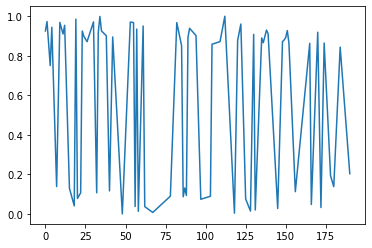

In [131]:
df_rp_gdp2["Indicateur représentation politique"].plot()

## Régression sur tous les indicateurs

Liste des indicateurs :
- df_pib
- df_rp_gdp2
- df_activite_economique2
- df_autonomie_corps3
- df_education3
- df_ressources_eco2
- df_sante2
- df_famille2

In [146]:
#On fusionne dans un même data frame tous les indicateurs
df_indicateurs=df_rp_gdp2.merge(df_activite_economique2, on='Country Code', how='outer')
df_indicateurs=df_indicateurs.merge(df_education3, on='Country Code', how='outer')
df_indicateurs=df_indicateurs.merge(df_ressources_eco2, on='Country Code', how='outer')
df_indicateurs=df_indicateurs.merge(df_sante2, on='Country Code', how='outer')
df_indicateurs=df_indicateurs.merge(df_famille2, on='Country Code', how='outer')
df_indicateurs=df_indicateurs.merge(df_autonomie_corps3, on='Country Code', how='outer')
df_indicateurs

,Country Code,Indicateur représentation politique,Indicateur activité économique,Indicateur education,Indicateur ressources économiques,Indicateur sante,Indicateur famille,indicateur autonomie corps
0,AFG,0.925551,NaN,NaN,NaN,0.368477,0.437282,0.000000
1,ZAF,0.973086,0.373365,0.384492,0.902762,0.375185,0.776205,0.731065
2,DZA,0.750786,NaN,NaN,0.442670,0.640306,0.670161,NaN
3,DEU,0.944425,0.698322,0.352426,0.890479,0.920906,0.923131,0.813759
4,ATG,0.138413,NaN,NaN,NaN,NaN,0.845038,NaN
...,...,...,...,...,...,...,...,...
228,AND,NaN,NaN,NaN,NaN,NaN,0.965059,NaN
229,DMA,NaN,NaN,NaN,NaN,NaN,0.860238,NaN
230,PLW,NaN,NaN,NaN,NaN,NaN,0.807827,NaN
231,SMR,NaN,NaN,NaN,NaN,NaN,0.965059,NaN


On cherche à remplacer les NaN par la valeur moyenne sur la ligne afin de pouvoir effectuer une régression linéaire

In [147]:
#On modifie l'index du data frame 
df_indicateurs = df_indicateurs.set_index("Country Code")
df_indicateurs

,Indicateur représentation politique,Indicateur activité économique,Indicateur education,Indicateur ressources économiques,Indicateur sante,Indicateur famille,indicateur autonomie corps
Country Code,,,,,,,
AFG,0.925551,NaN,NaN,NaN,0.368477,0.437282,0.000000
ZAF,0.973086,0.373365,0.384492,0.902762,0.375185,0.776205,0.731065
DZA,0.750786,NaN,NaN,0.442670,0.640306,0.670161,NaN
DEU,0.944425,0.698322,0.352426,0.890479,0.920906,0.923131,0.813759
ATG,0.138413,NaN,NaN,NaN,NaN,0.845038,NaN
...,...,...,...,...,...,...,...
AND,NaN,NaN,NaN,NaN,NaN,0.965059,NaN
DMA,NaN,NaN,NaN,NaN,NaN,0.860238,NaN
PLW,NaN,NaN,NaN,NaN,NaN,0.807827,NaN


In [148]:
#On transpose la matrice pour permettre de calculer la moyenne par colonne (sur les indicateurs)
df_indicateurs = df_indicateurs.T
df_indicateurs

Country Code,AFG,ZAF,DZA,DEU,ATG,ARG,AUS,AUT,BHR,BLR,...,WSM,KIR,TON,KWT,VCT,AND,DMA,PLW,SMR,KNA
Indicateur représentation politique,0.925551,0.973086,0.750786,0.944425,0.138413,0.968892,0.910171,0.954212,0.129325,0.040895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicateur activité économique,NaN,0.373365,NaN,0.698322,NaN,0.544696,0.750078,0.668657,NaN,0.856635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicateur education,NaN,0.384492,NaN,0.352426,NaN,NaN,NaN,NaN,0.119662,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicateur ressources économiques,NaN,0.902762,0.442670,0.890479,NaN,0.949499,0.868785,0.895291,NaN,0.957416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicateur sante,0.368477,0.375185,0.640306,0.920906,NaN,0.818298,0.986573,NaN,NaN,0.757308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicateur famille,0.437282,0.776205,0.670161,0.923131,0.845038,0.799616,0.902690,0.937107,0.849057,0.950734,...,0.523061,0.575472,0.577568,0.829315,0.865129,0.965059,0.860238,0.807827,0.965059,0.825297
indicateur autonomie corps,0.000000,0.731065,NaN,0.813759,NaN,NaN,0.826692,0.870972,NaN,0.853153,...,0.177247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
#On calcule la moyenne pour chaque colonne
#On remplace les nan par la valeur moyenne de la colonne
df_indicateurs = df_indicateurs.fillna(value = df_indicateurs.mean())
df_indicateurs

Country Code,AFG,ZAF,DZA,DEU,ATG,ARG,AUS,AUT,BHR,BLR,...,WSM,KIR,TON,KWT,VCT,AND,DMA,PLW,SMR,KNA
Indicateur représentation politique,0.925551,0.973086,0.750786,0.944425,0.138413,0.968892,0.910171,0.954212,0.129325,0.040895,...,0.350154,0.575472,0.577568,0.829315,0.865129,0.965059,0.860238,0.807827,0.965059,0.825297
Indicateur activité économique,0.432827,0.373365,0.625981,0.698322,0.491726,0.544696,0.750078,0.668657,0.366015,0.856635,...,0.350154,0.575472,0.577568,0.829315,0.865129,0.965059,0.860238,0.807827,0.965059,0.825297
Indicateur education,0.432827,0.384492,0.625981,0.352426,0.491726,0.816200,0.874165,0.865248,0.119662,0.736024,...,0.350154,0.575472,0.577568,0.829315,0.865129,0.965059,0.860238,0.807827,0.965059,0.825297
Indicateur ressources économiques,0.432827,0.902762,0.442670,0.890479,0.491726,0.949499,0.868785,0.895291,0.366015,0.957416,...,0.350154,0.575472,0.577568,0.829315,0.865129,0.965059,0.860238,0.807827,0.965059,0.825297
Indicateur sante,0.368477,0.375185,0.640306,0.920906,0.491726,0.818298,0.986573,0.865248,0.366015,0.757308,...,0.350154,0.575472,0.577568,0.829315,0.865129,0.965059,0.860238,0.807827,0.965059,0.825297
Indicateur famille,0.437282,0.776205,0.670161,0.923131,0.845038,0.799616,0.902690,0.937107,0.849057,0.950734,...,0.523061,0.575472,0.577568,0.829315,0.865129,0.965059,0.860238,0.807827,0.965059,0.825297
indicateur autonomie corps,0.000000,0.731065,0.625981,0.813759,0.491726,0.816200,0.826692,0.870972,0.366015,0.853153,...,0.177247,0.575472,0.577568,0.829315,0.865129,0.965059,0.860238,0.807827,0.965059,0.825297


In [150]:
#On transpose le data frame à nouveau pour récupérer celui initial sans les NaN
df_indicateurs = df_indicateurs.T
df_indicateurs

,Indicateur représentation politique,Indicateur activité économique,Indicateur education,Indicateur ressources économiques,Indicateur sante,Indicateur famille,indicateur autonomie corps
Country Code,,,,,,,
AFG,0.925551,0.432827,0.432827,0.432827,0.368477,0.437282,0.000000
ZAF,0.973086,0.373365,0.384492,0.902762,0.375185,0.776205,0.731065
DZA,0.750786,0.625981,0.625981,0.442670,0.640306,0.670161,0.625981
DEU,0.944425,0.698322,0.352426,0.890479,0.920906,0.923131,0.813759
ATG,0.138413,0.491726,0.491726,0.491726,0.491726,0.845038,0.491726
...,...,...,...,...,...,...,...
AND,0.965059,0.965059,0.965059,0.965059,0.965059,0.965059,0.965059
DMA,0.860238,0.860238,0.860238,0.860238,0.860238,0.860238,0.860238
PLW,0.807827,0.807827,0.807827,0.807827,0.807827,0.807827,0.807827


In [151]:
#On ajoute les données sur le pib
df_indicateurs=df_indicateurs.merge(df_pib, on='Country Code', how='outer')
df_indicateurs

,Country Code,Indicateur représentation politique,Indicateur activité économique,Indicateur education,Indicateur ressources économiques,Indicateur sante,Indicateur famille,indicateur autonomie corps,Country Name,GDP per capita 2019
0,AFG,0.925551,0.432827,0.432827,0.432827,0.368477,0.437282,0.000000,Afghanistan,577.563058
1,ZAF,0.973086,0.373365,0.384492,0.902762,0.375185,0.776205,0.731065,South Africa,5574.643890
2,DZA,0.750786,0.625981,0.625981,0.442670,0.640306,0.670161,0.625981,Algeria,4111.306192
3,DEU,0.944425,0.698322,0.352426,0.890479,0.920906,0.923131,0.813759,Germany,43311.628981
4,ATG,0.138413,0.491726,0.491726,0.491726,0.491726,0.845038,0.491726,Antigua and Barbuda,16555.142078
...,...,...,...,...,...,...,...,...,...,...
261,SYR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Syrian Arab Republic,NaN
262,TCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Turks and Caicos Islands,28693.061321
263,VEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Venezuela, RB",NaN
264,VIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Virgin Islands (U.S.),NaN


In [152]:
#On supprime les NaN liés à la fusion du data frame pib
df_indicateurs.dropna(inplace=True)
df_indicateurs

,Country Code,Indicateur représentation politique,Indicateur activité économique,Indicateur education,Indicateur ressources économiques,Indicateur sante,Indicateur famille,indicateur autonomie corps,Country Name,GDP per capita 2019
0,AFG,0.925551,0.432827,0.432827,0.432827,0.368477,0.437282,0.000000,Afghanistan,577.563058
1,ZAF,0.973086,0.373365,0.384492,0.902762,0.375185,0.776205,0.731065,South Africa,5574.643890
2,DZA,0.750786,0.625981,0.625981,0.442670,0.640306,0.670161,0.625981,Algeria,4111.306192
3,DEU,0.944425,0.698322,0.352426,0.890479,0.920906,0.923131,0.813759,Germany,43311.628981
4,ATG,0.138413,0.491726,0.491726,0.491726,0.491726,0.845038,0.491726,Antigua and Barbuda,16555.142078
...,...,...,...,...,...,...,...,...,...,...
228,AND,0.965059,0.965059,0.965059,0.965059,0.965059,0.965059,0.965059,Andorra,39003.384448
229,DMA,0.860238,0.860238,0.860238,0.860238,0.860238,0.860238,0.860238,Dominica,7617.846091
230,PLW,0.807827,0.807827,0.807827,0.807827,0.807827,0.807827,0.807827,Palau,15213.715905
231,SMR,0.965059,0.965059,0.965059,0.965059,0.965059,0.965059,0.965059,San Marino,44709.458767


In [156]:
#On effectue la régression
X = df_indicateurs[["Indicateur représentation politique", "Indicateur activité économique", "Indicateur education", "Indicateur ressources économiques", "Indicateur sante", "Indicateur famille", "indicateur autonomie corps"]]
X = sm.add_constant(X)
y = df_indicateurs["GDP per capita 2019"]

model = sm.OLS(y, X.astype(float))
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     GDP per capita 2019   R-squared:                       0.370
Model:                             OLS   Adj. R-squared:                  0.351
Method:                  Least Squares   F-statistic:                     18.92
Date:                 Tue, 04 Jan 2022   Prob (F-statistic):           8.89e-20
Time:                         11:35:19   Log-Likelihood:                -2562.1
No. Observations:                  233   AIC:                             5140.
Df Residuals:                      225   BIC:                             5168.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Je pense qu'il faudra qu'on fasseune description de la répartition de chacun de nos indicateurs 
Toujours les problèmes avec l'indicateur domestique 
Est ce qu'on laisse des traces style scrappinget tout ? 

POur la méthode avec 100- quand on fait pour des valeurs qui sont inférieures à 10 on obtient des trucq compris entre 0.9 et 1

Positivité de certains ratios peu cohérents dans l'activitééco : regarder la distribution